<a href="https://colab.research.google.com/github/airon14/CpE-AIML/blob/main/58034_Lab04_Millicheckers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

# Part 1
Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [273]:
### YOUR CODE HERE
class MultipleLinearRegression():
  def correlation(X, y):
    global cor1, cor2
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values
    covar1 = np.mean((a-a.mean())*(y-y.mean()))
    covar2 = np.mean((b-b.mean())*(y-y.mean()))
    cor1 = covar1/(np.std(a)*np.std(y))
    cor2 = covar2/(np.std(b)*np.std(y))
    return print("R =", cor2, cor1) 

  def train(X,y):
    global w0,w1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values

    r1 = np.corrcoef(a, y)[0,1]
    r_sqrd = np.corrcoef(b, y)[0,1]
     
    w1 = r1*(np.std(y)/np.std(a))
    w0 = y.mean() - w1 * a.mean()
    w2 = y.mean() - r_sqrd * (np.std(y)/np.std(b))* b.mean()
    return print("w0=", w0, "w1=", w1, "w2=", w2)

  def predict(X):
    global predict1
    a = X.iloc[::,0].values
    predict1 = w0+w1*a
    i = np.array(list(range(0, predict1.size)))
    return print("y_h = ", predict, ", index = ", i) 

  def evaluate():
    r_sqrd = 1 - (np.sum(np.square(predict1 - y[0:5]))/np.sum(np.square(y - y.mean())))
    n = y.size 
    k = 1
    dframe = {'SST': np.sum(np.square(y - y.mean())),
         'SSR' : np.sum(np.square(predict1 - y.mean())),
         'SSE' : np.sum(np.square(predict1 - y[0:5])),
         'MSE' : np.mean(np.square(predict1 - y[0:5])),
         'RMSE' : np.sqrt(np.mean(np.square(predict1 - y[0:5]))),
         'R-squared' : r_sqrd,
         'Adjusted R-squared' : 1 - ((1 - r_sqrd)*(n - 1)/(n-k-1))}
    return dframe
  
  def visualize(X_test, y_test):
    a = X_test.iloc[::,0].values
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.scatter(a, y_test)
    plt.plot(a, predict1, color='blue')
    return plt.show() 

  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [274]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [275]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression

In [276]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlation(X,y)
R

R = 0.09301407775270563 0.86298272670127


Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [277]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train,y_train)

w0= 97706.91683160246 w1= 228.80069224806263 w2= -3483566.2271210123


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [278]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

y_h =  97935.71752385052 , index =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [279]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': 0.8262230365142222,
 'MSE': 20221484552.267723,
 'R-squared': 0.827978359377715,
 'RMSE': 142202.26634012457,
 'SSE': 101107422761.33862,
 'SSR': 32216351588.103653,
 'SST': 587759902740.0532}

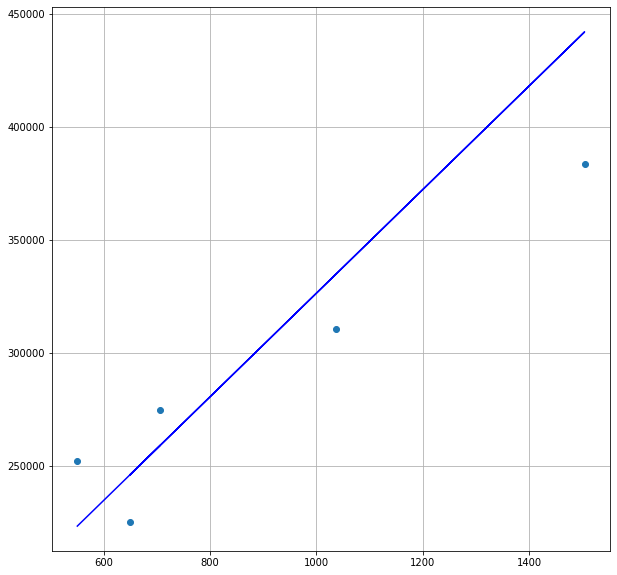

In [280]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)